# Team 12 - Unsupervised Predict

© Explore Data Science Academy

---

## Team Members

 - [Karabo Mampuru](https://www.linkedin.com/in/karabo-mampuru-318118a6/)
 - [Muhammad](https://www.linkedin.com/in/mpilenhle-hlatshwayo-70544b169/)
 - [Bohlale Kekana](https://www.linkedin.com/in/bohlale-kekana-8b753320b/)
 - [Tsepo](https://www.linkedin.com/in/sello-sydney-mafikeng-46a664110/)
 - [Mpilenhle Hlatshwayo](https://www.linkedin.com/in/mpilenhle-hlatshwayo-70544b169/)


## Introduction: Movie Recommender

Many businesses are based on making sure the user satisfaction is reached an ultimately exceeded. The results of not meeting user satisfaction include less traffic in the website, and this also results in a high churn rate. The ability to recommend a movie that a user might like, means that the user satisfaction rises, thus the business profit increases, the churn rate decreases, this can help in our company, Netflix, as it can keep a user interested in being in the web because of the remmendations of the movies they like.
 

<img src="https://raw.githubusercontent.com/kmsekgothe/unsupervised-predict-streamlit-template/master/resources/imgs/Image_header.png" width=75%/>


## Predict Overview

We have been tasked with creating a Machine Learning model that is able to predict a users next favourite movie based on the users past recommendations on movies, thus creating a `Content Based Recommender`. The second prediction will be based on the movie rating of all the users that have watched an rated the movie thus the `Collaborative Based Remmender`. These processes will be made created using different methods, since we will be using text data vectorization will be used.


The structure of this notebook is as follows:

 - First, we'll load our data to get a view of the predictor variables we will be modeling with, since this is an unsupervised learning there is no response variable. 
 
 - We will then preprocess our data, cleaning or removing unwanted charecters such as `Strokes |` `RT` `@ mentions` `urls` `emojis`.
 
 - We will preprocess our data, normalising the tokens in the tweets using processes such as  `Stemming` and `Lemmatizing`.
  
 - Then vectorise the tweets and splitting up the data into train and test sets.

 - We then model our data using a various models such as `SVC` `Naive Bayes` and `Linear Logistics`, paying attention to multiclass versus binary classification model parameters.
 
 - Following this modeling, we use the f1 score to determine the best performing model.
 
 - Using this metric, we then take several steps to improve our base model's performance by optimising the hyperparameters of the model through a `grid search strategy` , then use the `K best` for best feature selection.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Preprocessing </a>

<a href=#five>5. Feature Engineering</a>

<a href=#six>6. Modeling</a>

<a href=#seven>7. Model Performance</a>

<a href=#eight>8. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages

In [1]:
#Import nescessarry libraries

import numpy as np
import pandas as pd
import cufflinks as cf
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import nltk
from nltk.corpus import stopwords
import re
import string

# Entity featurization and similarity computation
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.feature_extraction.text import TfidfVectorizer

# importing tokenizing library
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer

# Libraries used during sorting procedures.
import operator # <-- Convienient item retrieval during iteration 
import heapq # <-- Efficient sorting of large lists



from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

In [2]:

import warnings
warnings.filterwarnings('ignore')
import datetime as dt
import requests
import bs4 as bs
import urllib.request

In [3]:
import re
import string
# importing tokenizing library
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
#importing stemmer library
from nltk import SnowballStemmer

In [4]:
from surprise import Reader, Dataset
from surprise import SVD, SVDpp, NormalPredictor, BaselineOnly, NMF, SlopeOne, CoClustering, KNNWithMeans

In [5]:
#extra 
from itertools import permutations
import pickle

In [6]:
# Performance Evaluation
from surprise import accuracy
from sklearn.metrics import mean_squared_error
from surprise.model_selection import GridSearchCV, cross_validate, train_test_split


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Load the Train and Test datasets from the github repository

In [154]:
# get test data
test_data = pd.read_csv('C:/Users/Mpilenhle/Documents/EDSA/unspervised/predict/unsupervised-predict-streamlit-template/Data/test.csv')


In [7]:
# get IMDB data
imdb_data = pd.read_csv('C:/Users/Mpilenhle/Documents/EDSA/unspervised/predict/unsupervised-predict-streamlit-template/Data/imdb_data.csv')

# get movies data
movies_data = pd.read_csv('C:/Users/Mpilenhle/Documents/EDSA/unspervised/predict/unsupervised-predict-streamlit-template/Data/movies.csv')

# get tags
tags_data = pd.read_csv('C:/Users/Mpilenhle/Documents/EDSA/unspervised/predict/unsupervised-predict-streamlit-template/Data/tags.csv')

# get test data
test_data = pd.read_csv('C:/Users/Mpilenhle/Documents/EDSA/unspervised/predict/unsupervised-predict-streamlit-template/Data/test.csv')

# get genome data
genome_scores_data = pd.read_csv('C:/Users/Mpilenhle/Documents/EDSA/unspervised/predict/unsupervised-predict-streamlit-template/Data/genome_scores.csv')

# get genome data
genome_tags_data = pd.read_csv('C:/Users/Mpilenhle/Documents/EDSA/unspervised/predict/unsupervised-predict-streamlit-template/Data/genome_tags.csv')

# get genome data
train_data = pd.read_csv('C:/Users/Mpilenhle/Documents/EDSA/unspervised/predict/unsupervised-predict-streamlit-template/Data/train.csv')



# Fetching more data
since some of the data is missing we need to collect the data, especially the new movies data

In [12]:
link_2020 = "https://en.wikipedia.org/wiki/List_of_American_films_of_2020"
link_2021 = "https://en.wikipedia.org/wiki/List_of_American_films_of_2021"

In [14]:
source_20 = urllib.request.urlopen(link_2020).read()
soup_20 = bs.BeautifulSoup(source_20,'lxml')

In [15]:
source_21 = urllib.request.urlopen(link_2021).read()
soup_21 = bs.BeautifulSoup(source_21,'lxml')

In [16]:
tables_20 = soup_20.find_all('table',class_='wikitable sortable')

In [17]:
tables_21 = soup_21.find_all('table',class_='wikitable sortable')

In [18]:
len(tables_21)

4

In [19]:
df1_20 = pd.read_html(str(tables_20[0]))[0]
df2_20 = pd.read_html(str(tables_20[1]))[0]
df3_20 = pd.read_html(str(tables_20[2]))[0]
df4_20 = pd.read_html(str(tables_20[3]).replace("'1\"\'",'"1"'))[0]

In [20]:
df_2020 = df1_20.append(df2_20.append(df3_20.append(df4_20,ignore_index=True),ignore_index=True),ignore_index=True)

In [21]:
df_2020.head()

,Opening,Opening.1,Title,Production company,Cast and crew,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.,Ref.
0,JANUARY,3,The Grudge,Screen Gems / Stage 6 Films / Ghost House Pict...,Nicolas Pesce (director/screenplay); Andrea Ri...,[2],NaN
1,JANUARY,10,Underwater,20th Century Fox / TSG Entertainment / Chernin...,"William Eubank (director); Brian Duffield, Ada...",[3],NaN
2,JANUARY,10,Like a Boss,Paramount Pictures,"Miguel Arteta (director); Sam Pitman, Adam Col...",[4],NaN
3,JANUARY,10,Three Christs,IFC Films,Jon Avnet (director/screenplay); Eric Nazarian...,NaN,NaN
4,JANUARY,10,Inherit the Viper,Barry Films / Tycor International Film Company,Anthony Jerjen (director); Andrew Crabtree (sc...,[5],NaN


In [22]:
df_2020.shape

(273, 7)

In [23]:
df1_21 = pd.read_html(str(tables_21[0]))[0]
df2_21 = pd.read_html(str(tables_21[1]))[0]
df3_21 = pd.read_html(str(tables_21[2]))[0]
df4_21 = pd.read_html(str(tables_21[3]).replace("'1\"\'",'"1"'))[0]

In [24]:
df_2021 = df1_21.append(df2_21.append(df3_21.append(df4_21,ignore_index=True),ignore_index=True),ignore_index=True)

In [26]:
df_2021.head(2)

,Opening,Opening.1,Title,Production company,Cast and crew,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.,Ref.
0,JANUARY,1,Shadow in the Cloud,Vertical Entertainment,Roseanne Liang (director/screenplay); Max Land...,[2],NaN
1,JANUARY,13,The White Tiger,Netflix,Ramin Bahrani (director/screenplay); Adarsh Go...,NaN,NaN


In [32]:
df_2021.shape

(356, 7)

In [29]:
def remove_punctuation(tweets):
    """
    This function removes the following punctuation marks: !"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~
    
    Function takes in a string object as its input argument and when called, outputs the string without punctuation.    
    """
    return ''.join([l for l in tweets if l not in string.punctuation])

In [27]:
pattern_url = r'ʻ'
subs_url = r''
df_2021['Title'] = df_2021['Title'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [30]:
c = df_2021['Title'].apply(remove_punctuation)

In [31]:
c[:20]

0                Shadow in the Cloud
1                    The White Tiger
2                        Locked Down
3                            The Dig
4                   Outside the Wire
5                       The Marksman
6     The Ultimate Playlist of Noise
7                      American Skin
8                   Dont Tell a Soul
9                         Our Friend
10                      No Mans Land
11                   Born a Champion
12                        Wrong Turn
13                     Penguin Bloom
14                 The Little Things
15                     Finding Ohana
16                         Nomadland
17                    Malcolm  Marie
18                            Palmer
19                           Falling
Name: Title, dtype: object

In [33]:
df_2021.isnull().sum()

Opening                                                                          0
Opening.1                                                                        0
Title                                                                            0
Production company                                                               0
Cast and crew                                                                    0
.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.    302
Ref.                                                                           118
dtype: int64

In [21]:
#pip install tmdbv3api

In [7]:
from tmdbv3api import TMDb
import json
import requests
tmdb = TMDb()
tmdb.api_key = '5e7481152ec747e2bb753efcb58a2073'

In [8]:
from tmdbv3api import Movie
tmdb_movie = Movie()
def get_overview(x):
    overview = ''
    result = tmdb_movie.search(x)
    movie_id = result[0].id
    req = 'https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key)
    response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key))
    data_json = response.json()
    if data_json['overview']:
        overview = data_json['overview']
    else:
        overview = np.nan
        
    
    
    return overview

In [9]:
from tmdbv3api import Movie
tmdb_movie = Movie() 
def get_genre(x):
    genres = []
    result = tmdb_movie.search(x)
    if not result:
        return np.NaN
    else:
        movie_id = result[0].id
        response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key))
        data_json = response.json()
        if data_json['genres']:
            genre_str = " " 
            for i in range(0,len(data_json['genres'])):
                genres.append(data_json['genres'][i]['name'])
            return genre_str.join(genres)
        else:
            return np.NaN

In [10]:
from tmdbv3api import Movie
tmdb_movie = Movie()
def get_tag(x):
    tagline = ''
    result = tmdb_movie.search(x)
    movie_id = result[0].id
    req = 'https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key)
    response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key))
    data_json = response.json()
    if data_json['tagline']:
        tagline = data_json['tagline']
    else:
        tagline = np.nan
        
    
    return tagline

In [40]:
df_2021['genres'] = df_2021['Title'].map(lambda x: get_genre(str(x)))

In [41]:
df_2021['overview'] = df_2021['Title'].map(lambda x: get_overview(str(x)))

In [42]:
df_2021['tag'] = df_2021['Title'].map(lambda x: get_tag(str(x)))

In [44]:
df_2021.head(2)

,Opening,Opening.1,Title,Production company,Cast and crew,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.,Ref.,genres,overview,tag
0,JANUARY,1,Shadow in the Cloud,Vertical Entertainment,Roseanne Liang (director/screenplay); Max Land...,[2],NaN,[Horror Action War],A WWII pilot traveling with top secret documen...,Every mission has its demons.
1,JANUARY,13,The White Tiger,Netflix,Ramin Bahrani (director/screenplay); Adarsh Go...,NaN,NaN,[Drama],An ambitious Indian driver uses his wit and cu...,Eat or get eaten up.


In [56]:
df_2020['genres'] = df_2020['Title'].map(lambda x: get_genre(str(x)))

In [57]:
df_2020['overview'] = df_2020['Title'].map(lambda x: get_overview(str(x)))

In [58]:
df_2020['tag'] = df_2020['Title'].map(lambda x: get_tag(str(x)))

In [59]:
df_2020.head(2)

,Opening,Opening.1,Title,Production company,Cast and crew,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.,Ref.,genres,overview,tag
0,JANUARY,3,The Grudge,Screen Gems / Stage 6 Films / Ghost House Pict...,Nicolas Pesce (director/screenplay); Andrea Ri...,[2],NaN,[Horror Mystery Thriller],An American nurse living and working in Tokyo ...,It never forgives. It never forgets.
1,JANUARY,10,Underwater,20th Century Fox / TSG Entertainment / Chernin...,"William Eubank (director); Brian Duffield, Ada...",[3],NaN,[Action Horror Science Fiction Thriller],After an earthquake destroys their underwater ...,7 miles below the ocean surface something has ...


In [55]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

'The SpongeBob Movie: Sponge on the Run'

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Exploratory Data Analysis refers to the critical process of performing initial investigations on a dataset so as to discover patterns in the data, spot anomalies, to check assumptions with the help of some statistics and graphical representations. The following section analyses and provides an overview of the given data. 

Looking at the shape and info of each table, looking at each each column of the data. Merging some tables to get to see the distribution of some columns.

Since there is more than one table we would like to explore each one


# Exploring with TMDB data

looking at the tmdb table looking at the columns we see the they are 5 columns


In [9]:
# looking at the imdb data
imdb_data.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [12]:
imdb_data.shape

(27278, 6)

In [216]:
imdb_data.isnull().sum()

movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64

From the above analysis we can see that there is a lot of missing data that we need like `director`, `title_cast` and the `plot_keyword`, all his data need to be collected

In [13]:
 d = imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [ ]:
fig = px.pie(values=[27278, 16200], names=['Total data', 'Available Data'], title='Missing data in the imdb_data in the plot_keyword column')
fig.show()

In [17]:
imdb_data.describe()

,movieId,runtime
count,27278.000000,15189.000000
mean,59855.480570,100.312331
std,44429.314697,31.061707
min,1.000000,1.000000
25%,6931.250000,89.000000
50%,68068.000000,98.000000
75%,100293.250000,109.000000
max,131262.000000,877.000000


# Exploring with movies table

With the Movies Data there is not that much missing, except the fact that for our content based we will need all the text datas contents to make a content based model.

In [18]:
movies_data.tail(5)

,movieId,title,genres
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),NaN
62422,209171,Women of Devil's Island (1962),Action|Adventure|Drama


In [19]:
movies_data.isnull().sum()

movieId       0
title         0
genres     5062
dtype: int64

Exploring the null values of genre is not visible from looking at nulls because it has a value of `(no genres listed)` this means they are nulls and we need the GENRE for our model training.

In [12]:
movies_data['genres'] = movies_data['genres'].replace('(no genres listed)', np.nan)

In [13]:
movies_data.isnull().sum()

movieId       0
title         0
genres     5062
dtype: int64

Now we can see the number of missing values from the data that was imputed with a value

In [14]:
no_genres = movies_data[movies_data['genres'].isnull()]

In [15]:
no_genres.head()

,movieId,title,genres
15881,83773,Away with Words (San tiao ren) (1999),NaN
16060,84768,Glitterbug (1994),NaN
16351,86493,"Age of the Earth, The (A Idade da Terra) (1980)",NaN
16491,87061,Trails (Veredas) (1978),NaN
17404,91246,Milky Way (Tejút) (2007),NaN


In [16]:
len(no_genres)

5062

the number of movies in the table with no genre values (nulls)

In [155]:
#no_genres.to_csv('No_genres.csv')

From our observation with the data the `genre` column is one of the important columns we gonna need, the Api is to be used to get more data for the missing genres

In [20]:
# split the title of movies to get both names of the movie including the onr in brackets
split_titles = [i.split('(') for i in no_genres['title']]

the movies in the API database are written in both French and English, in order to get the movies with both languages we will need to split our dat such that we can slice a list of titles of the same movie in different languages the English Language and the French language

In [21]:
split_titles[:3]

[['Away with Words ', 'San tiao ren) ', '1999)'],
 ['Glitterbug ', '1994)'],
 ['Age of the Earth, The ', 'A Idade da Terra) ', '1980)']]

in order to get the english version of the title of a movie we iterate the `split_titles` array and use the position Zero as the index of the English version of the movie.

In [154]:
# Iteerating through the data and getting the first index of the arrays of titles
english_version = [i[0] for i in split_titles]
english_version

['Away with Words ',
 'Glitterbug ',
 'Age of the Earth, The ',
 'Trails ',
 'Milky Way ',
 'Dancing Hawk, The ',
 'Warsaw Bridge ',
 'Ella Lola, a la Trilby ',
 'Promise of the Flesh ',
 'Nocturno 29 ',
 'Les hautes solitudes ',
 'Primus Hallucino-Genetics Live 2004 ',
 'La cravate ',
 'Study in Choreography for Camera, A ',
 "It's My Mother's Birthday Today ",
 'Spare Bed-Room ',
 'Madame Bovary ',
 'Christmas Oranges ',
 'Clockwork Mice ',
 'Lettera Amorosa ',
 'Passeio com Johnny Guitar ',
 'Conserva Acabada ',
 'Complicit ',
 'Conquest of Cochise ',
 'Crime and Punishment, USA ',
 'Danger Zone ',
 'Ecstasy in Entropy ',
 "Let's Spend the Night Together ",
 'Say It with Songs ',
 'Zanjeer ',
 'Whoregasm ',
 'Kiss Me Goodbye ',
 'Thrust in Me ',
 'The Wild World of Lydia Lunch ',
 'Fillmore ',
 'The Forgotten Faces ',
 'T,O,U,C,H,I,N,G ',
 'Little Hamlet ',
 'The Menacing Eye ',
 'In Order Not to Be Here ',
 'The Hearts of Age ',
 'A True Mob Story ',
 'Un centesimo di secondo ',
 '

using the function `get_genre()` we get the  genre of each movie in the database if the name of the movie is not recorgnized in the database it assigns null to it, using the english version of the movie's title

In [166]:
eng_genre = [get_genre2(i) for i in english_version]

Getting the second index of the `split_title` in order to get the French version (title) of the movie, so to get the genre if the movie title is indeed in the database, else we need to clean the data manually of each title not available

In [22]:
french_version = [i[1] if len(i) == 3 else i[0] for i in split_titles ]
french_version

['San tiao ren) ',
 'Glitterbug ',
 'A Idade da Terra) ',
 'Veredas) ',
 'Tejút) ',
 'Tanczacy jastrzab) ',
 'Pont de Varsòvia) ',
 'Ella Lola, a la Trilby ',
 'Yukcheui yaksok) ',
 'Nocturno 29 ',
 'Les hautes solitudes ',
 'Primus Hallucino-Genetics Live 2004 ',
 'La cravate ',
 'Study in Choreography for Camera, A ',
 "It's My Mother's Birthday Today ",
 'Spare Bed-Room ',
 'Madame Bovary ',
 'Christmas Oranges ',
 'Clockwork Mice ',
 'Lettera Amorosa ',
 'Passeio com Johnny Guitar ',
 'Conserva Acabada ',
 'Complicit ',
 'Conquest of Cochise ',
 'Crime and Punishment, USA ',
 'Danger Zone ',
 'Ecstasy in Entropy ',
 "Let's Spend the Night Together ",
 'Say It with Songs ',
 'Zanjeer ',
 'Whoregasm ',
 'Kiss Me Goodbye ',
 'Thrust in Me ',
 'The Wild World of Lydia Lunch ',
 'Fillmore ',
 'The Forgotten Faces ',
 'T,O,U,C,H,I,N,G ',
 'Little Hamlet ',
 'The Menacing Eye ',
 'In Order Not to Be Here ',
 'The Hearts of Age ',
 'A True Mob Story ',
 'Un centesimo di secondo ',
 'Sekire

Getting the genre of movies using the French version of the title, being aware of the duplicates that might appear just avoiding index mixup

In [165]:
french_genre = [get_genre2(i) for i in french_version]

In [ ]:
len(eng_genre)

Creating a dataframe for the genres in both languages

In [170]:
genres_df = pd.DataFrame(french_genre, columns = ['French'])

In [176]:
genres_df['title'] = [i for i in no_genres['title']]

In [205]:
genres_df.head(5)

,French,english,title
0,Comedy Drama,NaN,Away with Words (San tiao ren) (1999)
1,Music TV Movie Documentary,Music TV Movie Documentary,Glitterbug (1994)
2,Drama,NaN,"Age of the Earth, The (A Idade da Terra) (1980)"
3,Drama Fantasy,Drama Documentary Adventure,Trails (Veredas) (1978)
4,NaN,Family Documentary,Milky Way (Tejút) (2007)


Looking at the data that got no genres from the Database and see what might be the cause of this error

In [191]:
genres_df[(genres_df['French'].isnull()) & (genres_df['english'].isnull())]

,French,english,title
7,NaN,NaN,"Ella Lola, a la Trilby (1898)"
11,NaN,NaN,Primus Hallucino-Genetics Live 2004 (2004)
13,NaN,NaN,"Study in Choreography for Camera, A (1945)"
14,NaN,NaN,It's My Mother's Birthday Today (2008)
19,NaN,NaN,Lettera Amorosa (1995)
...,...,...,...
5044,NaN,NaN,Whoopi Goldberg: Direct from Broadway (1985)
5046,NaN,NaN,Indian Day School (1898)
5047,NaN,NaN,The Magic Book (1900)
5053,NaN,NaN,The Prep School Negro (2012)


Let us see the number of missing genres now

In [215]:
get_genre2('Primus Hallucino-Genetics')

'Music'

It appears some parts of the titles of the movies are the ones causing the error of null genres

In [192]:
len(genres_df[(genres_df['French'].isnull()) & (genres_df['english'].isnull())])

1052

number of original missing data before the process of fetching data

In [193]:
len(genres_df)

5062

This is quite an improvement to the total number of data that was missing

In [179]:
#genres_df.to_csv('Genres_dataframe.csv', index = False)

In [179]:
movies_data.shape

(62423, 5)

In [202]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movieId       62423 non-null  int64  
 1   title         62423 non-null  object 
 2   genres        62423 non-null  object 
 3   clean_titles  62423 non-null  object 
 4   year          62036 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.4+ MB


## Processing data to get clean name and year

looking at the movie distribution over the years

In [23]:
name_list = [re.findall('[A-Za-z]+', i) for i in movies_data.title]
names = [" ".join(i) for i in name_list]
movies_data['clean_titles'] = names

In [24]:
years_list = [re.findall('([0-9])', i) for i in movies_data.title]
years = ["".join(i) for i in years_list]
year = [i[-4:] for i in years]
movies_data['year'] = year

In [25]:
movies_data.head(1)

,movieId,title,genres,clean_titles,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995


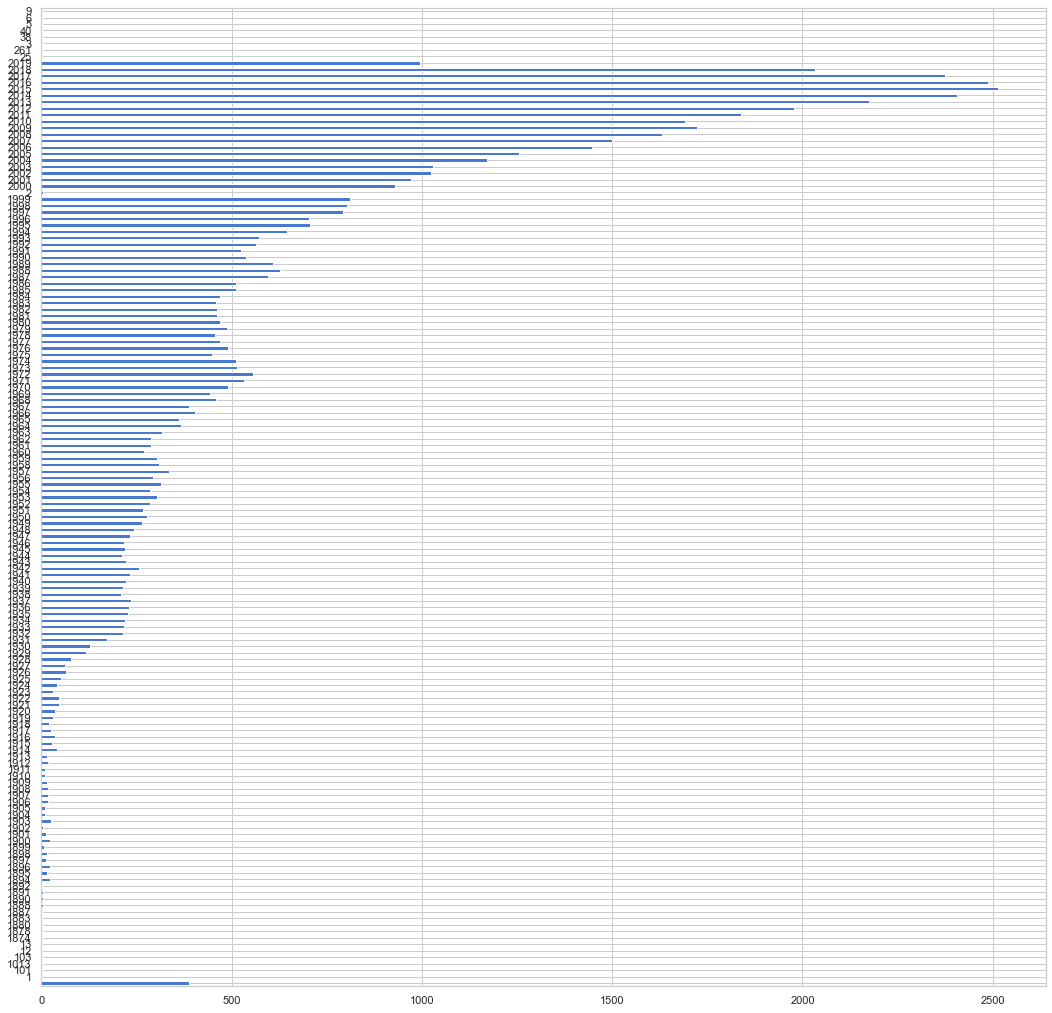

In [27]:
# we have movies only up to the year 2019
import matplotlib.pyplot as plt
movies_data.year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(18,18))
plt.show()

From the graph it appears we have got a few movies which are not years and one which is a serious outlier `1013`, `1`, `103`, etc. so these values did not have a year assigned to them.

Change year data type to float instead of the object

In [18]:
 movies_data['year'] =  movies_data['year'].apply(pd.to_numeric)

In [149]:
import plotly.io as pio
print(pio.renderers.default)

plotly_mimetype+notebook


In [148]:
import plotly.io as pio
pio.renderers.default = 'plotly_mimetype+notebook'

In [ ]:
import plotly.express as px
fig = px.bar(x = y_df.index , y = y_df.year)
fig.show()

## Exploring the Train data

The train data set has one of the important columns, the rating which contains the ratings of each movie given by a user.

In [28]:
# get train data
train_data.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [29]:
train_data.shape

(10000038, 4)

Let us look at the distribution of the rating, which rating is mostly given by users

Average rating in dataset: 3.5333951730983424


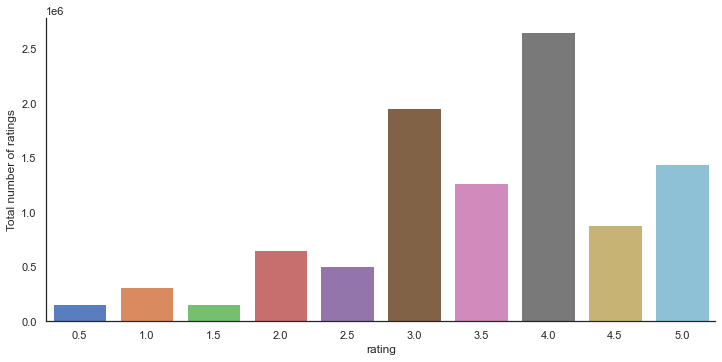

In [24]:
with sns.axes_style('white'):
    g = sns.factorplot("rating", data=train_data, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")
print (f'Average rating in dataset: {np.mean(train_data["rating"])}')

From the distribution of the ratings the most rating are above the mean, with a rating of 4.0 and the mean of the data is 3.5 that is the average rating in the data, which means the highest number  of ratings is above average.

we need to know the number of unique movies that were rated which is 48213

In [25]:
len(train_data.movieId.unique())

48213

We also would like to know how many users rated the movies in the table which  is 162541

In [30]:
len(train_data.userId.unique())

162541

In [31]:
train_data.tail(2)

,userId,movieId,rating,timestamp
10000036,85805,327,4.0,1479921530
10000037,139457,1009,4.0,858984862


Let us see the mean distribution of each movie in the train_data

In [32]:
movie_mean_ratings = train_data.groupby('movieId')[['rating']].mean()

In [34]:
movie_mean_ratings.head()

,rating
movieId,
1,3.889971
2,3.263414
3,3.132325
4,2.878099
5,3.059165


also have a look at the sorted version of the data frame

In [35]:
sorted_movie_mean_ratings = movie_mean_ratings['rating'].sort_values(ascending = False)

To confirm if each movie has it's own correct mean rating and the correct number of rantings count, let us have a look at each of them close just the two movieId's will be enough

In [36]:
# looking at mean average of the first movie
sorted_movie_mean_ratings[sorted_movie_mean_ratings.index == 1]

movieId
1    3.889971
Name: rating, dtype: float64

In [38]:
# looking at mean average of the second movie
sorted_movie_mean_ratings[sorted_movie_mean_ratings.index == 2]

movieId
2    3.263414
Name: rating, dtype: float64

Let us see the count of users who rated that movie regardles of the rating of that movie, so to see the if the movie mean is really affected by the number of users who actually rated that movie

In [39]:
number_of_ratings = train_data[train_data['movieId'] == 1]

In [40]:
len(number_of_ratings)

23062

The above count shows the number of times the movieId appears in the table and it is indeed the count we see below, in the data frame `movie_rating_count`

In [43]:
movie_rating_count = train_data.groupby('movieId')[['rating']].count()

In [44]:
movie_rating_count.head(2)

,rating
movieId,
1,23062
2,9654


Let us create a data frame for both the mean and the count of rating  given to each movie

In [46]:
# Create a data frame
mean_rating_count = pd.DataFrame()

In [47]:
# create a colmn with mean ratings of movies
mean_rating_count['mean_rating'] = sorted_movie_mean_ratings

In [48]:
# Create a column with the count of movies
mean_rating_count['rating_count'] = movie_rating_count

In [49]:
mean_rating_count.head()

,mean_rating,rating_count
movieId,,
186117,5.0,1
165199,5.0,1
179607,5.0,1
120258,5.0,1
120272,5.0,1


In [50]:
mean_rating_count.shape

(48213, 2)

In [51]:
# Checking the correspondence of mean vakue and count value
mean_rating_count[mean_rating_count.index == 1]

,mean_rating,rating_count
movieId,,
1,3.889971,23062


In [52]:
# Checking the correspondence of mean vakue and count value
mean_rating_count[mean_rating_count.index == 2]

,mean_rating,rating_count
movieId,,
2,3.263414,9654


In [54]:
mean_rating_count.head(2)

,mean_rating,rating_count
movieId,,
186117,5.0,1
165199,5.0,1


In [ ]:
Let us see the diatribution of the counts of movie ratings 

The mean count of the number of ratings per movie is 207.41372658826458


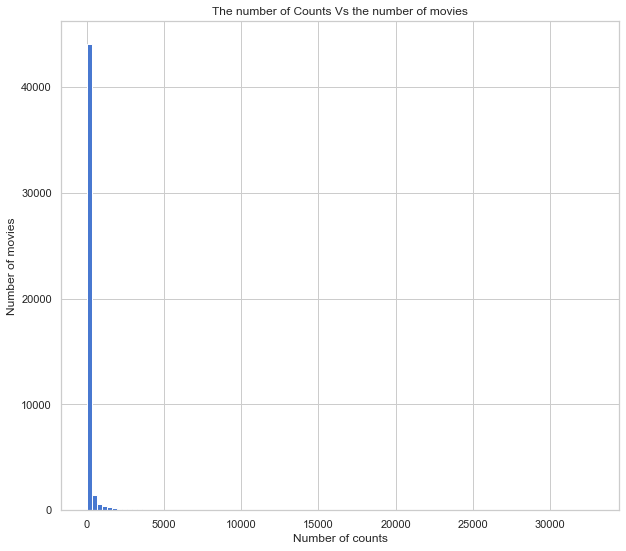

In [56]:
plt.figure(figsize = (10,9))
plt.xlabel('Number of counts')
plt.ylabel('Number of movies')
plt.title('The number of Counts Vs the number of movies')
mean_rating_count['rating_count'].hist(bins = 100)
print('The mean count of the number of ratings per movie is ' + str(mean_rating_count['rating_count'].mean()))

From our distribution most of the movies are rated less than 5000 times this might call on the implicit rating approach to come in place. The average number of count per movie is `207` which means the data has too much outliers. one of wich we saw was `23000` which means most movies are rated by a few people 

Now to see the ratings of the movies and their count, actually to see what number of movies are rated a certain score. We need to see the distribution of the ratings.

The mean count of the number of ratings per movie is 3.100321797644897


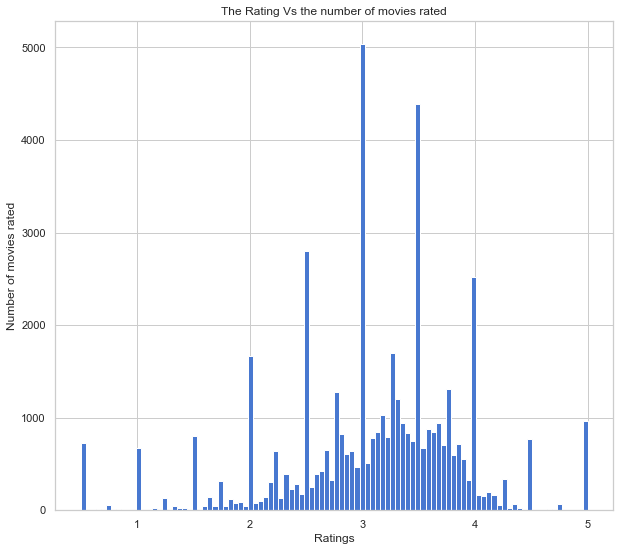

In [57]:
plt.figure(figsize = (10,9))
plt.xlabel('Ratings')
plt.ylabel('Number of movies rated')
plt.title('The Rating Vs the number of movies rated')
mean_rating_count['mean_rating'].hist(bins = 100)
print('The mean count of the number of ratings per movie is ' + str(mean_rating_count['mean_rating'].mean()))

most movies are rated below the average of 3.1 and the high peaks from the integer ratings might mean users do not like rating in decimals. Interestingly less than 1000 movies got a rating of 5.

Now To see which movies have a high rating and a less number of ratings count we will use the joint plot to see exactly which movies have a high rating and a high number of users rating that movie.

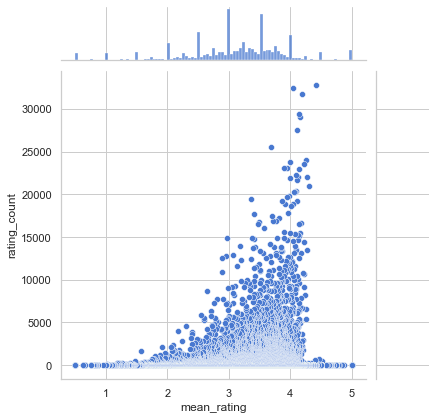

In [58]:
sns.jointplot(x = 'mean_rating', y = 'rating_count', data = mean_rating_count)

The average count of ratings for each of the movies seems to go higher as the mean rate increases, meaning a movie that is rated good also seems to be rated by many people, while the movies rated bad, seems to also have a low number of users rating that movie.

## Exploring the tags Data 

The Tags data has tags which are the users way of describing the movie after they have watched it, which might help another user with getting the same movie using the tag.

In [59]:
# get tags
tags_data.head(10)

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455
5,4,44665,unreliable narrators,1573943619
6,4,115569,tense,1573943077
7,4,115713,artificial intelligence,1573942979
8,4,115713,philosophical,1573943033
9,4,115713,tense,1573943042


In [60]:
tags_data.shape

(1093360, 4)

## Exploring The Genome Tags Data 

The Tags data has tags which are the users way of describing the movie after they have watched it, which might help another user with getting the same movie using the tag.

In [38]:
# genome tags
genome_tags_data.head(10)

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s
5,6,1950s
6,7,1960s
7,8,1970s
8,9,1980s
9,10,19th century


In [10]:
genome_tags_data.shape

(1128, 2)

## Exploring the Genome scores Data 

The Tags data has tags which are the users way of describing the movie after they have watched it, which might help another user with getting the same movie using the tag.

In [61]:
# get genome scores
genome_scores_data.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [62]:
genome_scores_data.shape

(15584448, 3)

In [64]:
# The number of unique movies in the table
len(genome_scores_data['movieId'].unique())

13816

In [138]:
#number of unique tags in the table
len(genome_scores_data['tagId'].unique())

1128

In [32]:
test_data.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [11]:
test_data.shape

(5000019, 2)

In [67]:
len(test_data['movieId'].unique())

39643

It appears we will be using the text data to  predict for the content based model and we will be using the numerical data for the collaborative based method of prediction.

this means the tables `imdb_data` and the `movies_data` table will be used for the formation of the training data set of the model, merge them to create a data that is concistant accross all movies

for the collaborative based model we can use the 

## Collaborative Data analysis

<a id="four"></a>
## 4. Data Preprocessing
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Before we can do feature Engineering, Exploratory Data Analysis (EDA) in section 3, showed we need to ensure that our data is in a clean format that can actually be used. Since our data is in different formats and is also  used to make different models, both collaborative and content based models. Especially the Name of the movies are in both languages and if we are to recommend a movie a language in which it is 

Since we will create the content based model using the text data let us extract and vectorise our data. we will be removing the characters we will not be needing for the training of our model.

 - strokes .
 - $ .


For the collaborative based we will be using the train_data table which contains the rating, userId and MovieId for every movie that was rated.




## Content based Preprocessing

In [71]:
imdb_data.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,tom hanks|tim allen|don rickles|jim varney|wal...,john lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,robin williams|jonathan hyde|kirsten dunst|bra...,jonathan hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,walter matthau|jack lemmon|sophia loren|ann-ma...,mark steven johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,whitney houston|angela bassett|loretta devine|...,terry mcmillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,steve martin|diane keaton|martin short|kimberl...,albert hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


Lowering of the columns with text data to make all the words the same meaning and `Bad` is no different from `bad`

In [69]:
imdb_data['title_cast'] = imdb_data['title_cast'].str.lower()
imdb_data['director'] = imdb_data['director'].str.lower()
imdb_data['plot_keywords'] = imdb_data['plot_keywords'].str.lower()

In [70]:
movies_data.head(2)

,movieId,title,genres,clean_titles,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,Jumanji,1995


In [130]:
movies_data.shape

(62423, 5)

In [131]:
imdb_data.shape

(27278, 6)

In [72]:
movies_data['title'] = movies_data['title'].str.lower()
movies_data['genres'] = movies_data['genres'].str.lower()
movies_data['clean_titles'] = movies_data['clean_titles'].str.lower()

In [73]:
new_movies = pd.merge( movies_data,imdb_data, how = 'left', on = 'movieId')

In [74]:
new_movies.head()

,movieId,title,genres,clean_titles,year,title_cast,director,runtime,budget,plot_keywords
0,1,toy story (1995),adventure|animation|children|comedy|fantasy,toy story,1995,tom hanks|tim allen|don rickles|jim varney|wal...,john lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,jumanji (1995),adventure|children|fantasy,jumanji,1995,robin williams|jonathan hyde|kirsten dunst|bra...,jonathan hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,grumpier old men (1995),comedy|romance,grumpier old men,1995,walter matthau|jack lemmon|sophia loren|ann-ma...,mark steven johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,waiting to exhale (1995),comedy|drama|romance,waiting to exhale,1995,whitney houston|angela bassett|loretta devine|...,terry mcmillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,father of the bride part ii (1995),comedy,father of the bride part ii,1995,steve martin|diane keaton|martin short|kimberl...,albert hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [75]:
new_movies.shape

(62423, 10)

In [76]:
# spliting the cast names for each cast member
casts = [i.split('|') if i is not np.nan else np.nan for i in new_movies['title_cast'] ]

In [77]:
# taking the first three actors of the data 
three_casts = [i[:3] if i is not np.nan else np.nan for i in  casts]

In [78]:
# taking each of the the cast names and removing the space between them to not make mistakes or decrese them
name_array = []
for array in three_casts:
    if array is not np.nan:
        new_names = [i.replace(" ", "") if i is not np.nan else np.nan for i in array]
        name_array.append(new_names)
    else:
        name_array.append(np.nan)
        

In [79]:
# Joining each of the three characters to make one string
cast_join = [" ".join(i) if i is not np.nan else np.nan for i in name_array]

In [80]:
len(cast_join)

62423

In [85]:
# creates a column for the new created cast with only three cast members and a director
new_movies['title_cast_short'] = cast_join

In [87]:
# replacing the stroke of each genre and replacing it with a space
new_movies['genres'] = new_movies['genres'].str.replace('|', " ")

# removing space from each direcors name
new_movies['director'] = new_movies['director'].str.replace(' ', "")

In [82]:
# replacing the stroke of each plot keyword and replacing it with a space
new_movies['plot_keywords'] = new_movies['plot_keywords'].str.replace('|', " ")

In [83]:
new_movies['title'] = new_movies['title'].str.lower()

In [88]:
new_movies.head()

,movieId,title,genres,clean_titles,year,title_cast,director,runtime,budget,plot_keywords,title_cast_short
0,1,toy story (1995),adventure animation children comedy fantasy,toy story,1995,tom hanks|tim allen|don rickles|jim varney|wal...,johnlasseter,81.0,"$30,000,000",toy rivalry cowboy cgi animation,tomhanks timallen donrickles
1,2,jumanji (1995),adventure children fantasy,jumanji,1995,robin williams|jonathan hyde|kirsten dunst|bra...,jonathanhensleigh,104.0,"$65,000,000",board game adventurer fight game,robinwilliams jonathanhyde kirstendunst
2,3,grumpier old men (1995),comedy romance,grumpier old men,1995,walter matthau|jack lemmon|sophia loren|ann-ma...,markstevenjohnson,101.0,"$25,000,000",boat lake neighbor rivalry,waltermatthau jacklemmon sophialoren
3,4,waiting to exhale (1995),comedy drama romance,waiting to exhale,1995,whitney houston|angela bassett|loretta devine|...,terrymcmillan,124.0,"$16,000,000",black american husband wife relationship betra...,whitneyhouston angelabassett lorettadevine
4,5,father of the bride part ii (1995),comedy,father of the bride part ii,1995,steve martin|diane keaton|martin short|kimberl...,alberthackett,106.0,"$30,000,000",fatherhood doberman dog mansion,stevemartin dianekeaton martinshort


Choosing the main features we gonna use for training our model

In [89]:
features = ['movieId', 'title' ,'genres', 'director', 'plot_keywords', 'title_cast_short']

In [90]:
training_data = new_movies[features]

In [91]:
training_data.head(5)

,movieId,title,genres,director,plot_keywords,title_cast_short
0,1,toy story (1995),adventure animation children comedy fantasy,johnlasseter,toy rivalry cowboy cgi animation,tomhanks timallen donrickles
1,2,jumanji (1995),adventure children fantasy,jonathanhensleigh,board game adventurer fight game,robinwilliams jonathanhyde kirstendunst
2,3,grumpier old men (1995),comedy romance,markstevenjohnson,boat lake neighbor rivalry,waltermatthau jacklemmon sophialoren
3,4,waiting to exhale (1995),comedy drama romance,terrymcmillan,black american husband wife relationship betra...,whitneyhouston angelabassett lorettadevine
4,5,father of the bride part ii (1995),comedy,alberthackett,fatherhood doberman dog mansion,stevemartin dianekeaton martinshort


In [92]:
training_data.shape

(62423, 6)

In [93]:
training_data.isnull().sum()

movieId                 0
title                   0
genres               5062
director            47076
plot_keywords       48039
title_cast_short    47222
dtype: int64

dropping all the null values from our table to make the data more ballanced 

In [97]:
no_null_training_data = training_data.dropna(0, how = 'any')

In [98]:
no_null_training_data.head()

,movieId,title,genres,director,plot_keywords,title_cast_short
0,1,toy story (1995),adventure animation children comedy fantasy,johnlasseter,toy rivalry cowboy cgi animation,tomhanks timallen donrickles
1,2,jumanji (1995),adventure children fantasy,jonathanhensleigh,board game adventurer fight game,robinwilliams jonathanhyde kirstendunst
2,3,grumpier old men (1995),comedy romance,markstevenjohnson,boat lake neighbor rivalry,waltermatthau jacklemmon sophialoren
3,4,waiting to exhale (1995),comedy drama romance,terrymcmillan,black american husband wife relationship betra...,whitneyhouston angelabassett lorettadevine
4,5,father of the bride part ii (1995),comedy,alberthackett,fatherhood doberman dog mansion,stevemartin dianekeaton martinshort


In [100]:
no_null_training_data.shape

(14180, 6)

In [102]:
no_null_training_data.isnull().sum()

movieId             0
title               0
genres              0
director            0
plot_keywords       0
title_cast_short    0
dtype: int64

In [103]:
#no_null_training_data.to_csv('no_null_training_data.csv', index = False)

Since we do not have any missing data from our table we can now join all the columns to a single string which will be vectorised in the tfidf to create new features

In [364]:
no_null_training_data.head(2)

,movieId,title,genres,director,plot_keywords,title_cast_short,combo_feature
0,1,toy story (1995),adventure animation children comedy fantasy,john lasseter,toy rivalry cowboy cgi animation,tomhanks timallen donrickles,adventure animation children comedy fantasy jo...
1,2,jumanji (1995),adventure children fantasy,jonathan hensleigh,board game adventurer fight game,robinwilliams jonathanhyde kirstendunst,adventure children fantasy jonathan hensleigh ...


Joining all of the features that describe the movie content in order to create a feature of all the columns combined

In [104]:
all_features =  no_null_training_data['genres'] + ' ' + no_null_training_data['director'] + ' ' + no_null_training_data['plot_keywords'] + " " + no_null_training_data['title_cast_short'] 

In [105]:
all_features[20000]

'drama fantasy thriller war amyjump occultism vomiting stones psychedelia folk horror julianbarratt peterferdinando richardglover'

In [106]:
no_null_training_data['combo_feature'] = all_features

In [107]:
no_null_training_data.head()

,movieId,title,genres,director,plot_keywords,title_cast_short,combo_feature
0,1,toy story (1995),adventure animation children comedy fantasy,johnlasseter,toy rivalry cowboy cgi animation,tomhanks timallen donrickles,adventure animation children comedy fantasy jo...
1,2,jumanji (1995),adventure children fantasy,jonathanhensleigh,board game adventurer fight game,robinwilliams jonathanhyde kirstendunst,adventure children fantasy jonathanhensleigh b...
2,3,grumpier old men (1995),comedy romance,markstevenjohnson,boat lake neighbor rivalry,waltermatthau jacklemmon sophialoren,comedy romance markstevenjohnson boat lake nei...
3,4,waiting to exhale (1995),comedy drama romance,terrymcmillan,black american husband wife relationship betra...,whitneyhouston angelabassett lorettadevine,comedy drama romance terrymcmillan black ameri...
4,5,father of the bride part ii (1995),comedy,alberthackett,fatherhood doberman dog mansion,stevemartin dianekeaton martinshort,comedy alberthackett fatherhood doberman dog m...


Now we have a combo feature for all the features that we gonna use to train our model

## Collaborative based Preprocessing

<a id="five"></a>
## 5. Feature Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Feature engineering, the process of creating features that can be fed into a machine learning model from raw text data, is one of the more important part of text classification using machine learning. It is the process of using domain knowledge of the data to create features that make machine learning algorithms work. The better the quality of information you provide a machine learning algorithm, the more it will be able to interpret the information well. Feature engineering helps us to create better data which helps the model understand it well and provide reasonable results. 


In [110]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,2),
                     min_df=0)

# Produce a feature matrix, where each row corresponds to a book,
# with TF-IDF features as columns 
tf_combo_matrix = tf.fit_transform(no_null_training_data['combo_feature'])

Now to make sure our dataframe has a rating  column since it is the one that can help us measure our perfomance

In [111]:
train_data.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [352]:
train_data.shape

(10000038, 4)

Joining the table with the rating to the cleaned training table

In [112]:
rating_data = pd.merge(train_data, no_null_training_data, how = 'left', on = 'movieId' )

In [113]:
rating_data.shape

(10000038, 10)

<a id="six"></a>
## 6. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


Training the models with the no_null_training_data dataframe, this is done to get the best perfoming models in the original data, this is to find the best models in predicting our data using the `combo_feature` column

## Content based Modelling


We now can compute the similarity between each vector within our matrix. This is done by making use of the `cosine_similarity` function provided to us by `sklearn`.

In [115]:
cosine_sim_combo = cosine_similarity(tf_combo_matrix, 
                                        tf_combo_matrix)
print (cosine_sim_combo.shape)

(14180, 14180)


In [116]:
titles = no_null_training_data['title']
indices = pd.Series(no_null_training_data.index, index = no_null_training_data['title'])

In [117]:
def content_generate_top_N_recommendations(movie_title, N=10):
    # Convert the string book title to a numeric index for our 
    # similarity matrix
    b_idx = indices[movie_title]
    # Extract all similarity values computed with the reference book title
    sim_scores = list(enumerate(cosine_sim_combo[b_idx]))
    # Sort the values, keeping a copy of the original index of each value
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Select the top-N values for recommendation
    sim_scores = sim_scores[1:N]
    # Collect indexes 
    book_indices = [i[0] for i in sim_scores]
    # Convert the indexes back into titles 
    return titles.iloc[book_indices]

In [118]:
content_generate_top_N_recommendations("sabrina (1995)", N=10)

9235                carolina (2005)
2713        mickey blue eyes (1999)
9134           beautiful joe (2000)
16746    griff the invisible (2011)
26423          rubber johnny (2005)
10312                  leila (1996)
23883    crazy for christmas (2005)
23621         action jackson (2014)
17402                singham (2011)
Name: title, dtype: object

In [119]:
content_generate_top_N_recommendations("mickey blue eyes (1999)", N=10)

12534    last mistress, the (vieille maîtresse, une) (2...
10360                                     manderlay (2005)
21614                                  kid cannabis (2014)
21061                                        gloria (2013)
17566      to die like a man (morrer como um homem) (2009)
8152          anatomy of hell (anatomie de l'enfer) (2004)
4168                                 under the sand (2000)
3787                                     back stage (2000)
976                            2 days in the valley (1996)
Name: title, dtype: object

In [266]:
rating_data.head()

,userId,movieId,rating,timestamp,title,genres,director,plot_keywords,title_cast_short,combo_feature
0,5163,57669,4.0,1518349992,in bruges (2008),comedy crime drama thriller,martin mcdonagh,dwarf bruges irish hitman,elizabethberrington rudyblomme olivierbonjour,comedy crime drama thriller martin mcdonagh dw...
1,106343,5,4.5,1206238739,father of the bride part ii (1995),comedy,albert hackett,fatherhood doberman dog mansion,stevemartin dianekeaton martinshort,comedy albert hackett fatherhood doberman dog ...
2,146790,5459,5.0,1076215539,men in black ii (a.k.a. miib) (a.k.a. mib 2) (...,action comedy sci-fi,lowell cunningham,lingerie michael jackson character shorthaired...,tommyleejones willsmith riptorn,action comedy sci-fi lowell cunningham lingeri...
3,106362,32296,2.0,1423042565,miss congeniality 2: armed and fabulous (2005),adventure comedy crime,marc lawrence,female protagonist cleave gag good woman fbi,sandrabullock reginaking enriquemurciano,adventure comedy crime marc lawrence female pr...
4,9041,366,3.0,833375837,wes craven's new nightmare (nightmare on elm s...,drama horror mystery thriller,wes craven,freddy krueger elm street famous director as h...,jeffdavis heatherlangenkamp mikohughes,drama horror mystery thriller wes craven fredd...


In [121]:
rating_data.to_csv('Rating_data.csv', index = False)

In [270]:
len(rating_data['userId'].unique())

162541

In [126]:
rating_data = rating_data.dropna(axis=0, how='any', thresh=None, subset=None)

In [129]:
rating_data.isnull().sum()

userId              0
movieId             0
rating              0
timestamp           0
title               0
genres              0
director            0
plot_keywords       0
title_cast_short    0
combo_feature       0
dtype: int64

Now for creating the model that will predidct the users rating to a movie they have never watched, the following function is to be used and the rating will be predicted.

In [127]:
def content_generate_rating_estimate(movie_title, user, rating_data, k=20, threshold=0.0):
    # Convert the book title to a numeric index for our 
    # similarity matrix
    b_idx = indices[movie_title]
    neighbors = [] # <-- Stores our collection of similarity values 
     
    # Gather the similarity ratings between each book the user has rated
    # and the reference book 
    for index, row in rating_data[rating_data['userId']==user].iterrows():
        sim = cosine_sim_combo[b_idx-1, indices[row['title']]-1]
        neighbors.append((sim, row['rating']))
    # Select the top-N values from our collection
    k_neighbors = heapq.nlargest(k, neighbors, key=lambda t: t[0])

    # Compute the weighted average using similarity scores and 
    # user item ratings. 
    simTotal, weightedSum = 0, 0
    for (simScore, rating) in k_neighbors:
        # Ensure that similarity ratings are above a given threshold
        if (simScore > threshold):
            simTotal += simScore
            weightedSum += simScore * rating
    try:
        predictedRating = weightedSum / simTotal
    except ZeroDivisionError:
        # Cold-start problem - No ratings given by user. 
        # We use the average rating for the reference item as a proxy in this case 
        predictedRating = np.mean(rating_data[rating_data['title']==book_title]['rating'])
    return predictedRating

## Collaborative based Modelling

In this Predict we will build a recommendation model by using the Surprise method
Surprise is a Python scikit for building and analyzing recommender systems that deal with explicit rating data.

**Surprise was designed with the following purposes in mind:**

+ Give users perfect control over their experiments
+ Provide various ready-to-use prediction algorithms such as baseline algorithms, neighborhood methods
+ Make it easy to implement new algorithm ideas.
+ Provide tools to evaluate, analyze and compare the algorithms’ performance. Cross-validation procedures can be run very easily using powerful CV iterators (inspired by sci-kit-learn excellent tools.

In [291]:
!pip install LibRecommender
!pip install surprise
#!pip install comet_ml
#!pip install seaborn
#!pip install wordcloud


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Mpilenhle\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Mpilenhle\\AppData\\Local\\Temp\\pip-install-p4j038js\\librecommender\\setup.py'"'"'; __file__='"'"'C:\\Users\\Mpilenhle\\AppData\\Local\\Temp\\pip-install-p4j038js\\librecommender\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Mpilenhle\AppData\Local\Temp\pip-wheel-dbskz19w'
       cwd: C:\Users\Mpilenhle\AppData\Local\Temp\pip-install-p4j038js\librecommender\
  Complete output (103 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.8
  creating build\lib.win-amd64-3.8\libreco
  copying libreco\__init__.py -> build\lib.win-amd64-3.8\libreco
  creating build\lib.win-amd64-3.8\serving
  copying serving


  Running setup.py clean for LibRecommender
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=c47636900afb70e17f1fe25aeae54cf1c598533a67d4c85eb539cc122a50dcb7
  Stored in directory: c:\users\mpilenhle\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
Failed to build LibRecommender
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 2.0.0
    Uninstalling importlib-metadata-2.0.0:
      Successfully uninstalled importlib-metadata-2.0.0
    Running setup.py install for LibRecommender: started
    Running setup.py install for LibRecommender: finished with status 'error'


  copying libreco\algorithms\_bpr.cpp -> build\lib.win-amd64-3.8\libreco\algorithms
  copying libreco\algorithms\_bpr.pyx -> build\lib.win-amd64-3.8\libreco\algorithms
  copying libreco\utils\_similarities.cpp -> build\lib.win-amd64-3.8\libreco\utils
  copying libreco\utils\_similarities.pyx -> build\lib.win-amd64-3.8\libreco\utils
  creating build\lib.win-amd64-3.8\serving\flask\knn
  copying serving\flask\knn\knn_deploy.py -> build\lib.win-amd64-3.8\serving\flask\knn
  copying serving\flask\knn\knn_request.py -> build\lib.win-amd64-3.8\serving\flask\knn
  creating build\lib.win-amd64-3.8\serving\flask\tf
  copying serving\flask\tf\tf_deploy.py -> build\lib.win-amd64-3.8\serving\flask\tf
  copying serving\flask\tf\tf_request.py -> build\lib.win-amd64-3.8\serving\flask\tf
  creating build\lib.win-amd64-3.8\serving\flask\vector
  copying serving\flask\vector\vector_deploy.py -> build\lib.win-amd64-3.8\serving\flask\vector
  copying serving\flask\vector\vector_request.py -> build\lib.win

  Using cached surprise-0.1-py2.py3-none-any.whl (1.8 kB)


In [179]:
train_data.head(1)

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992


In [184]:
# Load the 100k dataset
tests = train_data.copy()
train_data.drop('timestamp', axis=1, inplace=True)
train_subset = train_data[:100000]
reader = Reader(rating_scale=(train_subset['rating'].min(), train_subset['rating'].max()))
data = Dataset.load_from_df(train_subset[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.25, random_state=42)

A factorization of a matrix into three matrices is called Singular Value Decomposition (SVD). It possesses some interesting algebraic characteristics and communicates important geometrical and theoretical insights into linear transformations.
 
The SVD-like model in Python's Surprise-package does not determine the SVD factors, but rather sets an optimisation problem for the matrix factors, this is done to account for sparsity of matrix also. It assumes that ratings matrix can be appriximated by product of 2 factors. These matrix factors are assumed to create latent features becuase they too, like in PCA, describe the features of matrix in a different feature space.

In [185]:
svd_sub = SVD()
svd_sub.fit(trainset)
svd_pred = svd_sub.test(testset)

# Model Preformance
svd_rmse = accuracy.rmse(svd_pred)

RMSE: 0.9824


#### SVD ++

This is an extension of SVD but takes into account implicite ratings (i.e. whether a user rated item of interest or not, regardless of rating).

In [186]:
svdpp_sub = SVDpp()
svdpp_sub.fit(trainset)
svdpp_pred = svdpp_sub.test(testset)

# Model Preformance

svdpp_rmse = accuracy.rmse(svdpp_pred)

RMSE: 0.9786


<a id="seven"></a>
## 7. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [124]:
# Subset of ratings from user 314
rating_data[rating_data['movieId'] == 6][3:10]

,userId,movieId,rating,timestamp,title,genres,director,plot_keywords,title_cast_short,combo_feature
1159,57924,6,4.0,1404600032,heat (1995),action crime thriller,michaelmann,gun battle organized crime honor criminal inve...,alpacino robertdeniro valkilmer,action crime thriller michaelmann gun battle o...
2577,3367,6,4.0,1103955336,heat (1995),action crime thriller,michaelmann,gun battle organized crime honor criminal inve...,alpacino robertdeniro valkilmer,action crime thriller michaelmann gun battle o...
4017,146358,6,5.0,861801638,heat (1995),action crime thriller,michaelmann,gun battle organized crime honor criminal inve...,alpacino robertdeniro valkilmer,action crime thriller michaelmann gun battle o...
5374,54309,6,4.0,1481712145,heat (1995),action crime thriller,michaelmann,gun battle organized crime honor criminal inve...,alpacino robertdeniro valkilmer,action crime thriller michaelmann gun battle o...
6303,64236,6,4.0,980196777,heat (1995),action crime thriller,michaelmann,gun battle organized crime honor criminal inve...,alpacino robertdeniro valkilmer,action crime thriller michaelmann gun battle o...
7133,132746,6,5.0,988150607,heat (1995),action crime thriller,michaelmann,gun battle organized crime honor criminal inve...,alpacino robertdeniro valkilmer,action crime thriller michaelmann gun battle o...
7583,125129,6,5.0,832584883,heat (1995),action crime thriller,michaelmann,gun battle organized crime honor criminal inve...,alpacino robertdeniro valkilmer,action crime thriller michaelmann gun battle o...


In [130]:
title = "heat (1995)"
actual_rating = rating_data[(rating_data['userId'] == 3367) & (rating_data['title'] == title)]['rating'].values[0]
pred_rating = content_generate_rating_estimate(movie_title=title, user=3367, rating_data=rating_data)
print (f"Title - {title}")
print ("---")
print (f"Actual rating: \t\t {actual_rating}")
print (f"Predicted rating: \t {pred_rating}")

Title - heat (1995)
---
Actual rating: 		 4.0
Predicted rating: 	 3.9730908098370388


In [177]:
title = "heat (1995)"
actual_rating = rating_data[(rating_data['userId'] == 146358) & (rating_data['title'] == title)]['rating'].values[0]
pred_rating = content_generate_rating_estimate(movie_title=title, user = 146358, rating_data=rating_data)
print (f"Title - {title}")
print ("---")
print (f"Actual rating: \t\t {actual_rating}")
print (f"Predicted rating: \t {pred_rating}")

Title - heat (1995)
---
Actual rating: 		 5.0
Predicted rating: 	 4.975140255393156


In [ ]:
title = "Glory (1995)"
actual_rating = rating_data[(rating_data['userId'] == 132746) & (rating_data['title'] == title)]['rating'].values[0]
pred_rating = content_generate_rating_estimate(movie_title=title, user = 132746, rating_data=rating_data)
print (f"Title - {title}")
print ("---")
print (f"Actual rating: \t\t {actual_rating}")
print (f"Predicted rating: \t {pred_rating}")

## collaborative model perfomance

## Submission

In [133]:
rating_data.head(2)

,userId,movieId,rating,timestamp,title,genres,director,plot_keywords,title_cast_short,combo_feature
0,5163,57669,4.0,1518349992,in bruges (2008),comedy crime drama thriller,martinmcdonagh,dwarf bruges irish hitman,elizabethberrington rudyblomme olivierbonjour,comedy crime drama thriller martinmcdonagh dwa...
1,106343,5,4.5,1206238739,father of the bride part ii (1995),comedy,alberthackett,fatherhood doberman dog mansion,stevemartin dianekeaton martinshort,comedy alberthackett fatherhood doberman dog m...


In [162]:
rating_data_test = rating_data[['userId', 'movieId', 'title', 'combo_feature']]

In [163]:
rating_data_test.head()

,userId,movieId,title,combo_feature
0,5163,57669,in bruges (2008),comedy crime drama thriller martinmcdonagh dwa...
1,106343,5,father of the bride part ii (1995),comedy alberthackett fatherhood doberman dog m...
2,146790,5459,men in black ii (a.k.a. miib) (a.k.a. mib 2) (...,action comedy sci-fi lowellcunningham lingerie...
3,106362,32296,miss congeniality 2: armed and fabulous (2005),adventure comedy crime marclawrence female pro...
4,9041,366,wes craven's new nightmare (nightmare on elm s...,drama horror mystery thriller wescraven freddy...


In [135]:
available_data = [i for i in rating_data['movieId'].unique()]

In [146]:
available_users = [i for i in rating_data['userId'].unique()]

In [158]:
len(available_users)

162264

In [160]:
testing_frame =  test_data.copy()

In [161]:
testing_frame.head(1)

,userId,movieId
0,1,2011


In [169]:
submission_data = pd.merge(testing_frame, rating_data_test, how = 'left', on = 'userId')

MemoryError: Unable to allocate 5.88 GiB for an array with shape (789467174,) and data type int64

In [168]:
submission_data.tail(2)

,userId,movieId,title,combo_feature
5000017,162541,5689,NaN,NaN
5000018,162541,7153,NaN,NaN


In [171]:
#57669
movies_data[movies_data['movieId'] == 57669]

,movieId,title,genres,clean_titles,year
12111,57669,in bruges (2008),comedy|crime|drama|thriller,in bruges,2008


In [178]:
movies_data['genres'].value_counts()[:10]

drama                   9056
comedy                  5674
documentary             4731
comedy|drama            2386
drama|romance           2126
horror                  1661
comedy|romance          1577
comedy|drama|romance    1044
drama|thriller           933
thriller                 919
Name: genres, dtype: int64

In [156]:
data = []
for i in test_data['userId'].unique():
    if i in available_users:
        data.append(i)
    else:
        data.append(np.nan)
        
len(data)
        
    
    

162350